In [419]:
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values
from darts.dataprocessing.transformers import Scaler
from darts.models import NBEATSModel, RNNModel, ExponentialSmoothing
from darts.metrics import mape, rmse, mase, mse, mae, smape, ope
from darts.utils.model_selection import train_test_split

## Define functions and other stuff

In [420]:
def rmspe(y_true, y_pred):
    rmspe = (np.sqrt((1/len(y_true))*np.mean(np.square((y_true - y_pred) / y_true)))) * 100
    return rmspe

def to_df(series):
    jsoned_series = series.to_json()
    formatted_data = json.loads(jsoned_series)["data"]
    pred_df = pd.DataFrame.from_records(formatted_data, columns=["data"])
    return pred_df

## Run 100 times

In [421]:
# collection = dict(df_sd = [],
#                   df_min = [],
#                   df_max = [],
#                 #   NBEATS_mase = [], 
#                 #   NBEATS_rmse = [], 
#                 #   NBEATS_mse = [],
#                 #   NBEATS_mae = [], 
#                 #   NBEATS_smape = [],
#                 #   NBEATS_ope = [],
#                   NBEATS_rmspe = [],
#                   first_point_pred = [],
#                   first_point_df = [],
#                   last_point_pred = [],
#                   last_point_df = [])

In [422]:
# datapoints = 240
# count = 0

# while (count < 100):
#     df = pd.read_csv("filtered_dataset.csv")
#     df.drop_duplicates(inplace=True)
#     pH_df = df["pH"].reset_index()
#     temp_df = df["temp"].reset_index()
#     random_n = random.randint(0, len(pH_df)-datapoints)
#     filtered_ph_df = pH_df[random_n:random_n+datapoints]
#     filtered_temp_df = temp_df[random_n:random_n+datapoints]
#     series_pH = TimeSeries.from_dataframe(filtered_ph_df,"index","pH")
#     series_pH = fill_missing_values(series_pH, fill='auto')
#     scaler_pH = Scaler()
#     series_pH_scaled = scaler_pH.fit_transform(series_pH)
#     pH_train_time = series_pH_scaled.head(180)
#     pH_out_of_time = series_pH_scaled.tail(60)
#     NBEATS_model = NBEATSModel(
#         input_chunk_length=80,
#         output_chunk_length=60,
#         num_stacks=25,
#         num_blocks=2,
#         num_layers=6,
#         )
#     NBEATS_model.fit(
#         pH_train_time,
#         verbose=False,
#         epochs=20,
#         )
#     NBEATSpred_pH = NBEATS_model.predict(
#         n=len(pH_out_of_time),
#         series=pH_train_time,
#         )
#     # NBEATS_mase = mase(pH_out_of_time, NBEATSpred_pH, pH_train_time)
#     # NBEATS_rmse = rmse(pH_out_of_time, NBEATSpred_pH)
#     # NBEATS_mse = mse(pH_out_of_time, NBEATSpred_pH)
#     # NBEATS_mae = mae(pH_out_of_time, NBEATSpred_pH)
#     # NBEATS_smape = smape(pH_out_of_time, NBEATSpred_pH)
#     # NBEATS_ope = ope(pH_out_of_time, NBEATSpred_pH)
#     NBEATS_rmspe = rmspe(to_df(pH_out_of_time), to_df(NBEATSpred_pH))
#     if NBEATS_rmspe != float('inf'):
#         # collection["NBEATS_mase"].append(NBEATS_rmse)
#         # collection["NBEATS_rmse"].append(NBEATS_rmse)
#         # collection["NBEATS_mse"].append(NBEATS_mse)
#         # collection["NBEATS_mae"].append(NBEATS_mae)
#         # collection["NBEATS_smape"].append(NBEATS_smape)
#         # collection["NBEATS_ope"].append(NBEATS_ope)
#         collection["NBEATS_rmspe"].append(NBEATS_rmspe)
#         collection["df_sd"].append(filtered_ph_df["pH"].describe()["std"])
#         collection["df_min"].append(filtered_ph_df["pH"].describe()["min"])
#         collection["df_max"].append(filtered_ph_df["pH"].describe()["max"])
#         collection["first_point_pred"].append(float(NBEATSpred_pH[0].values()))
#         collection["first_point_df"].append(float(pH_out_of_time[0].values()))
#         collection["last_point_pred"].append(float(NBEATSpred_pH[-1].values()))
#         collection["last_point_df"].append(float(pH_out_of_time[-1].values()))
#         count = count + 1

In [423]:
# pd.DataFrame.from_dict(collection).to_csv(f"metric_vals.csv", index=False)
# pd.read_csv("metric_vals.csv").describe()

## Run once

In [424]:
df = pd.read_csv("filtered_dataset.csv")
df.drop_duplicates(inplace=True)
pH_df = df["pH"].reset_index()
temp_df = df["temp"].reset_index()

In [425]:
# Starting point extremeties
# rising: 4100

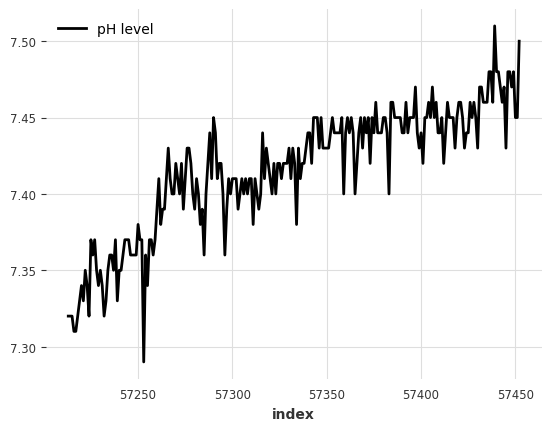

In [426]:
datapoints = 240
random_n = random.randint(0, len(pH_df)-datapoints)
filtered_ph_df = pH_df[random_n:random_n+datapoints]
filtered_temp_df = temp_df[random_n:random_n+datapoints]

series_pH = TimeSeries.from_dataframe(filtered_ph_df,"index","pH")
series_pH = fill_missing_values(series_pH, fill='auto')

series_pH.plot(label = 'pH level')
plt.legend()

In [427]:
random_n

57213

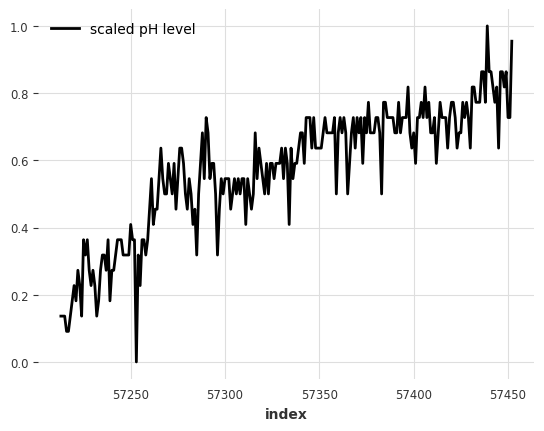

In [428]:
scaler_pH, scaler_temp = Scaler(), Scaler()
series_pH_scaled = scaler_pH.fit_transform(series_pH);

series_pH_scaled.plot(label = 'scaled pH level')
plt.legend()

In [429]:
pH_train_time = series_pH_scaled.head(180)
pH_out_of_time = series_pH_scaled.tail(60)

In [430]:
NBEATS_model = NBEATSModel(
    input_chunk_length=80,
    output_chunk_length=60,
    )

NBEATS_model.fit(
    pH_train_time,
    verbose=True,
    epochs=20,
    )

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.8 K     Non-trainable params
6.6 M     Total params
26.583    Total estimated model params size (MB)


Epoch 19: 100%|██████████| 2/2 [00:00<00:00,  8.22it/s, train_loss=0.00549]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 2/2 [00:00<00:00,  8.18it/s, train_loss=0.00549]


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=80, output_chunk_length=60)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 77.23it/s]


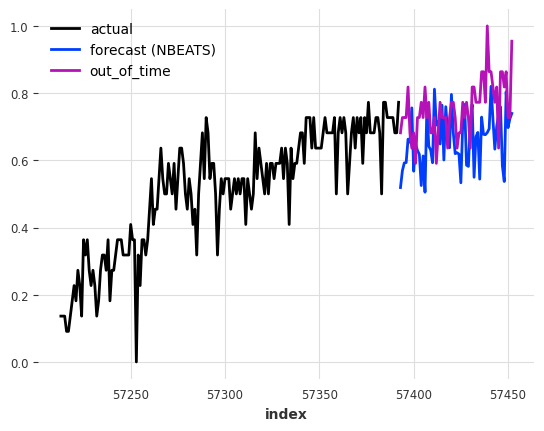

In [431]:
NBEATSpred_pH = NBEATS_model.predict(
    n=len(pH_out_of_time),
    series=pH_train_time,
    )

pH_train_time.plot(label='actual')
NBEATSpred_pH.plot(label='forecast (NBEATS)')
pH_out_of_time.plot(label="out_of_time")
plt.legend()

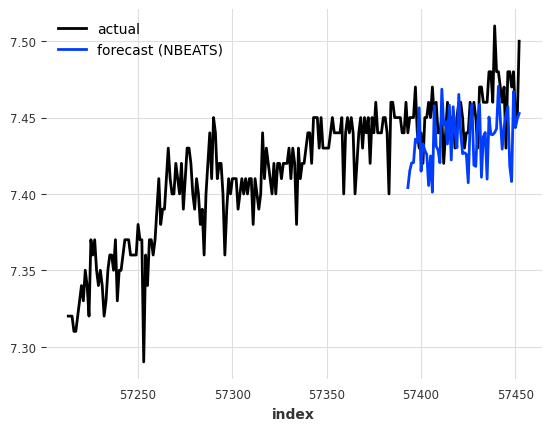

In [432]:
NBEATS_unscaled = scaler_pH.inverse_transform(NBEATSpred_pH)
series_pH.plot(label='actual')
NBEATS_unscaled.plot(label='forecast (NBEATS)')

In [433]:
print('RMSPE = {:.2f}'.format(rmspe(to_df(pH_out_of_time), to_df(NBEATSpred_pH))))
# print('MASE = {:.2f}'.format(mase(pH_out_of_time, NBEATSpred_pH, pH_train_time)))
# print('RMSE = {:.2f}'.format(rmse(pH_out_of_time, NBEATSpred_pH)))
# print('MSE = {:.2f}'.format(mse(pH_out_of_time, NBEATSpred_pH)))
# print('MAE = {:.2f}'.format(mae(pH_out_of_time, NBEATSpred_pH)))
# print('SMAPE = {:.2f}'.format(smape(pH_out_of_time, NBEATSpred_pH)))
# print('OPE = {:.2f}'.format(ope(pH_out_of_time, NBEATSpred_pH)))

RMSPE = 2.27
